In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Control Image

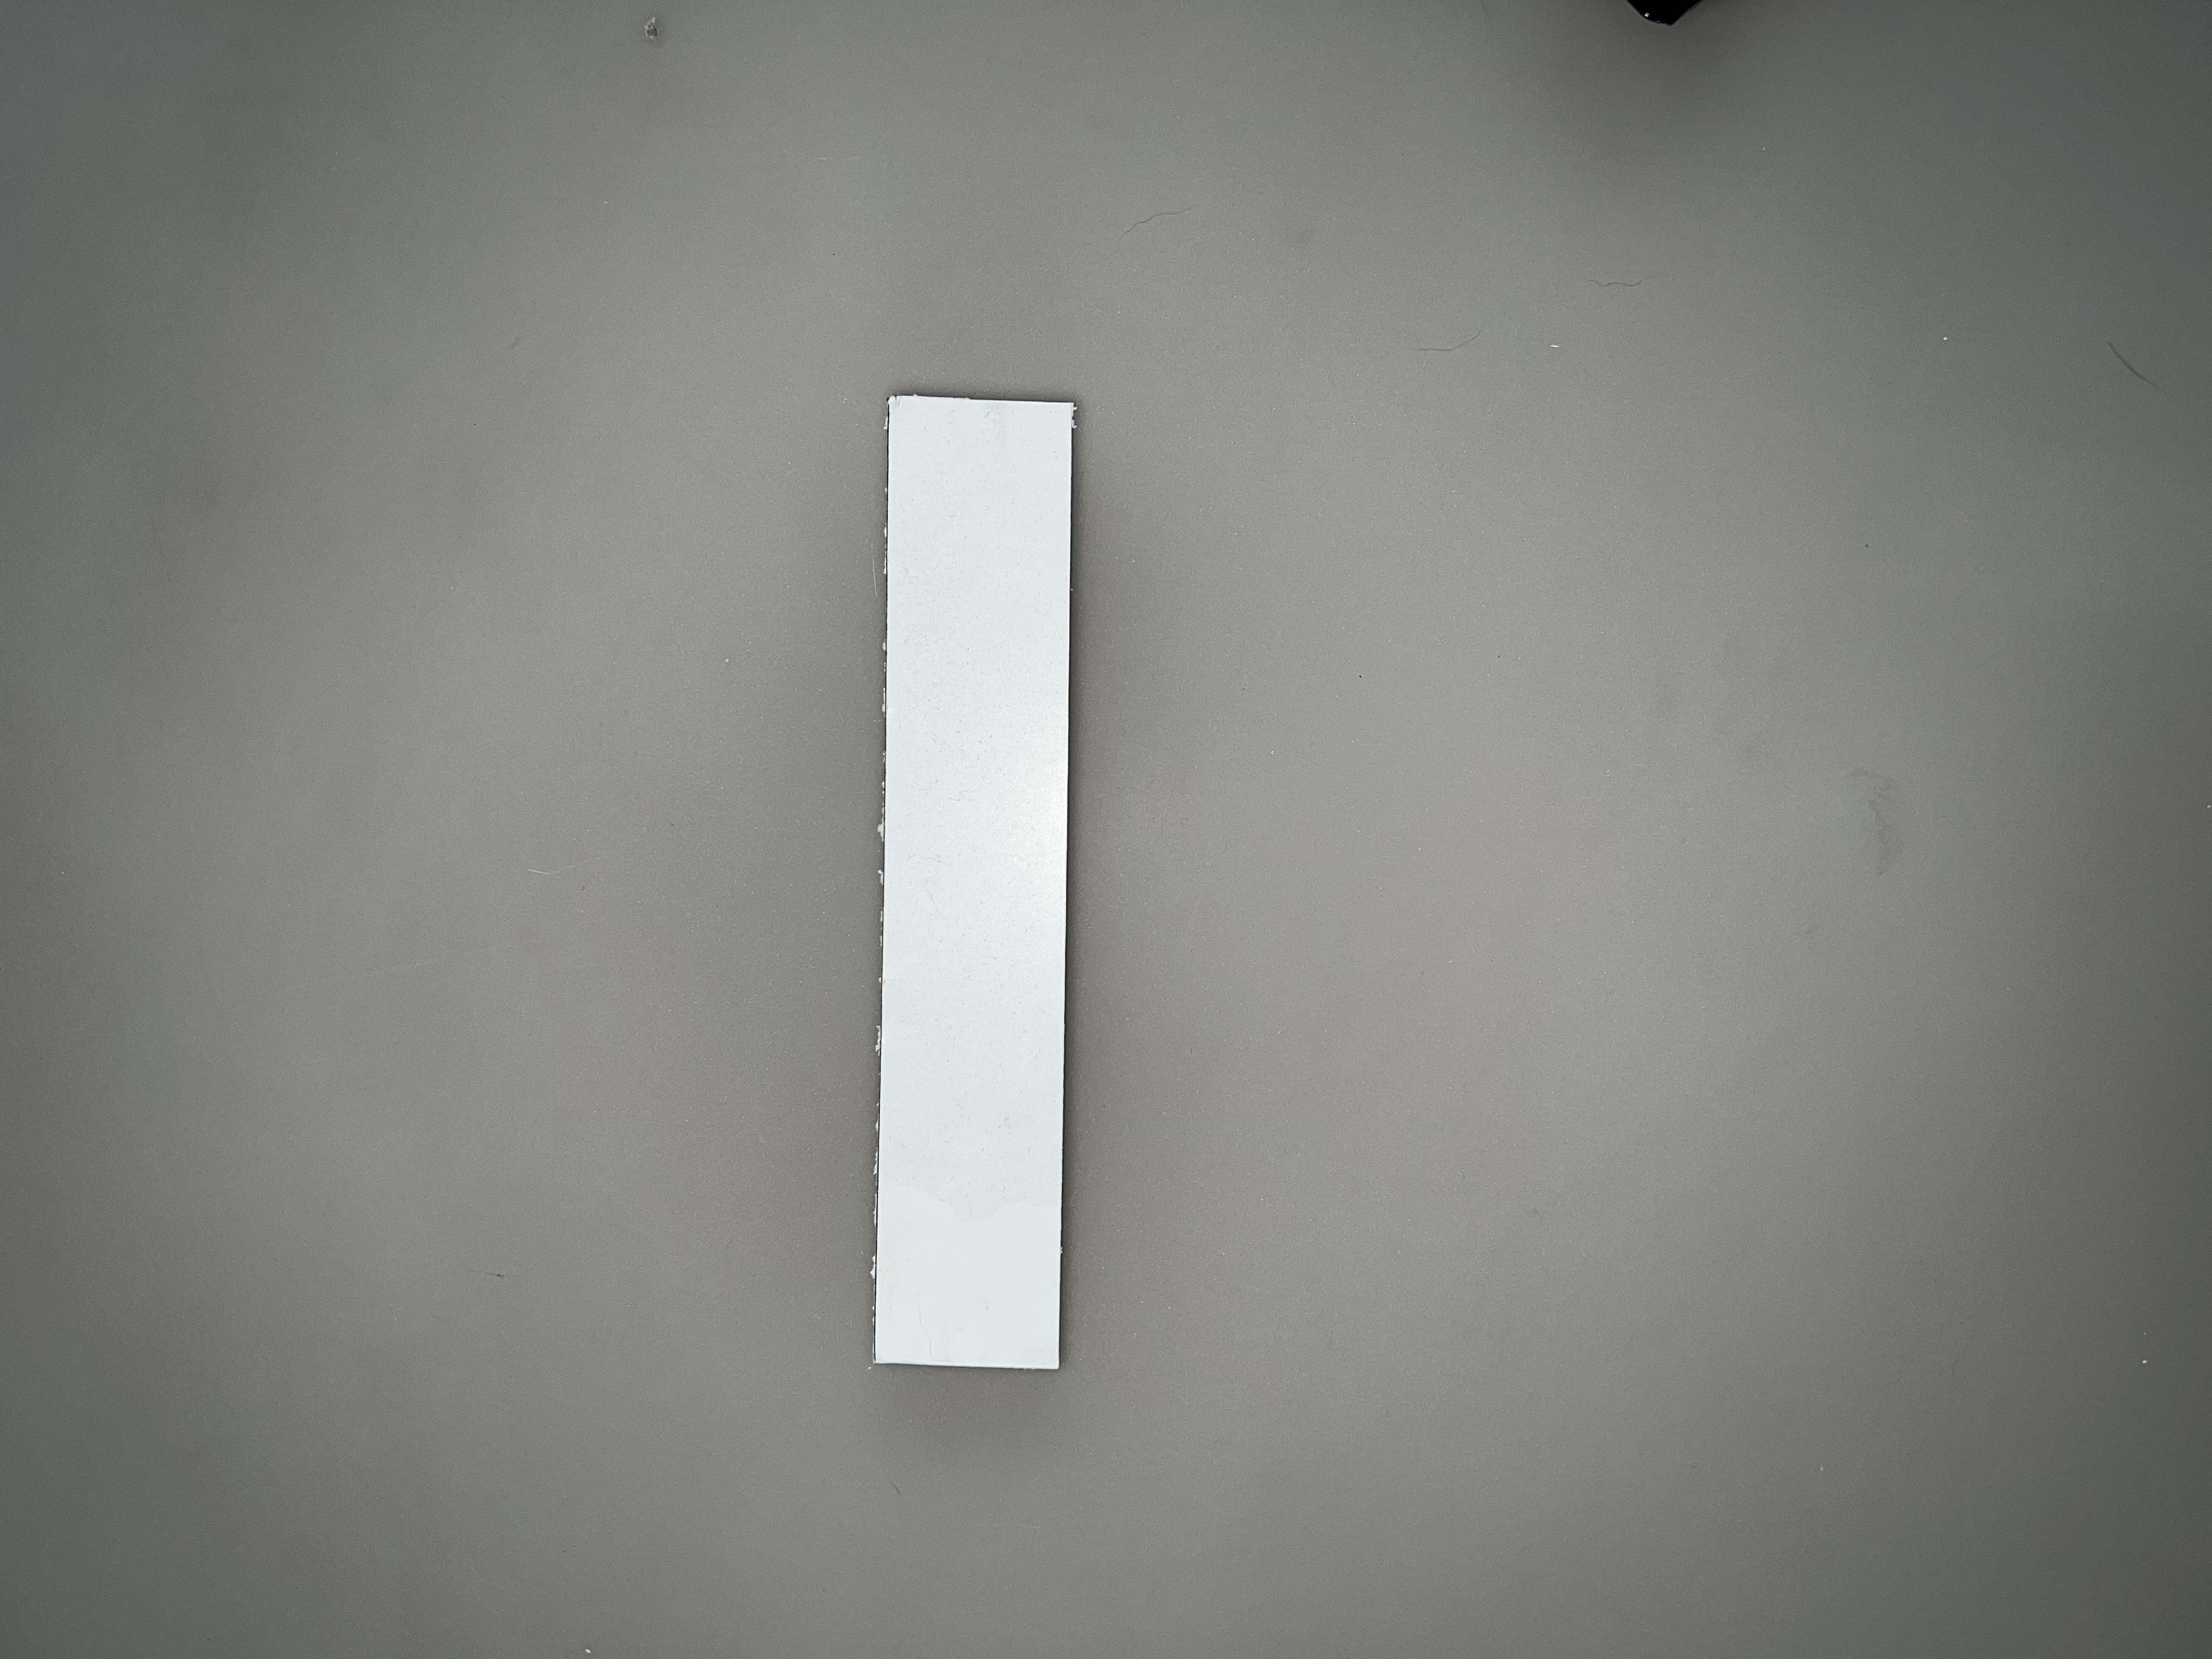

In [4]:
im1=cv2.imread("Photos/Object_Control_Full.jpg",0)
Image("Photos/Object_Control_Full.jpg")

In [5]:
im1.shape

(4032, 3024)

By using the original picture, the program would have to process 12,192,768 individual pixels; however,this specific notebook is aimed to have a rough estimate of the total dimensions of the object. <br>
Taking this into consideration, a resized image can be used. For this case, images will have a dimension of 400 by 300 pixels

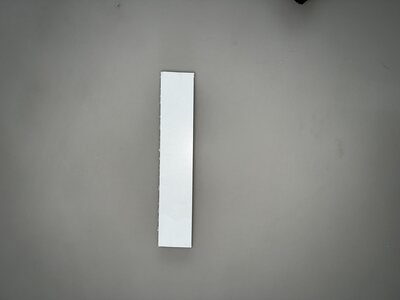

In [6]:
im2=cv2.imread("Photos/Object_Control_Resized.jpg",0)
Image("Photos/Object_Control_Resized.jpg")

In [7]:
im2.shape

(400, 300)

To correctly implement image processing to determine the dimensions of an object, it is important to have a high contrast between the object and the background. <br>
This contrast can be observed in the control object, as the background is clearly darker than the object.

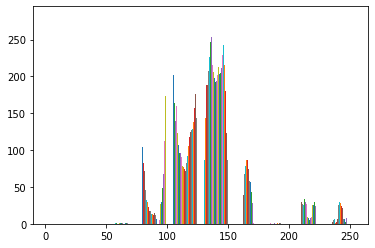

In [8]:
plt.hist(im2)
plt.show()

From the histogram, it can be observed that there is a significan gap at the value 150. Take into account that a value of 0 is black color, while a value of 255 represets white. <br>
For the control image, we will use a threshold value of 160. 

In [9]:
retval, im2_thresh=cv2.threshold(im2,160,255,cv2.THRESH_BINARY)

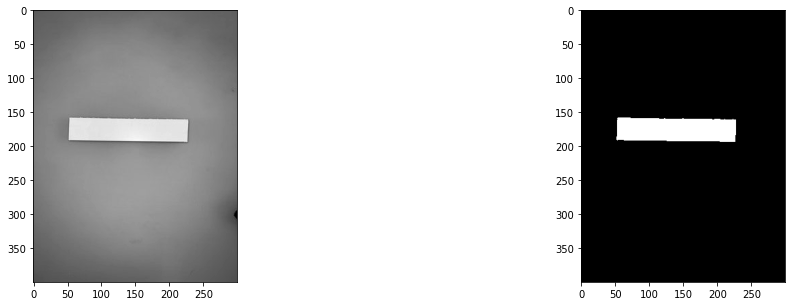

In [10]:
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(im2,cmap='gray')
plt.subplot(122); plt.imshow(im2_thresh, cmap='gray')

As observed, by applying these parameters, there is a clear distinction between the background and the object itself.<br>
<br>
To obtain the estimated dimensions of an object, it is important to have a visual reference for which we already know the dimensions of at least one side. 

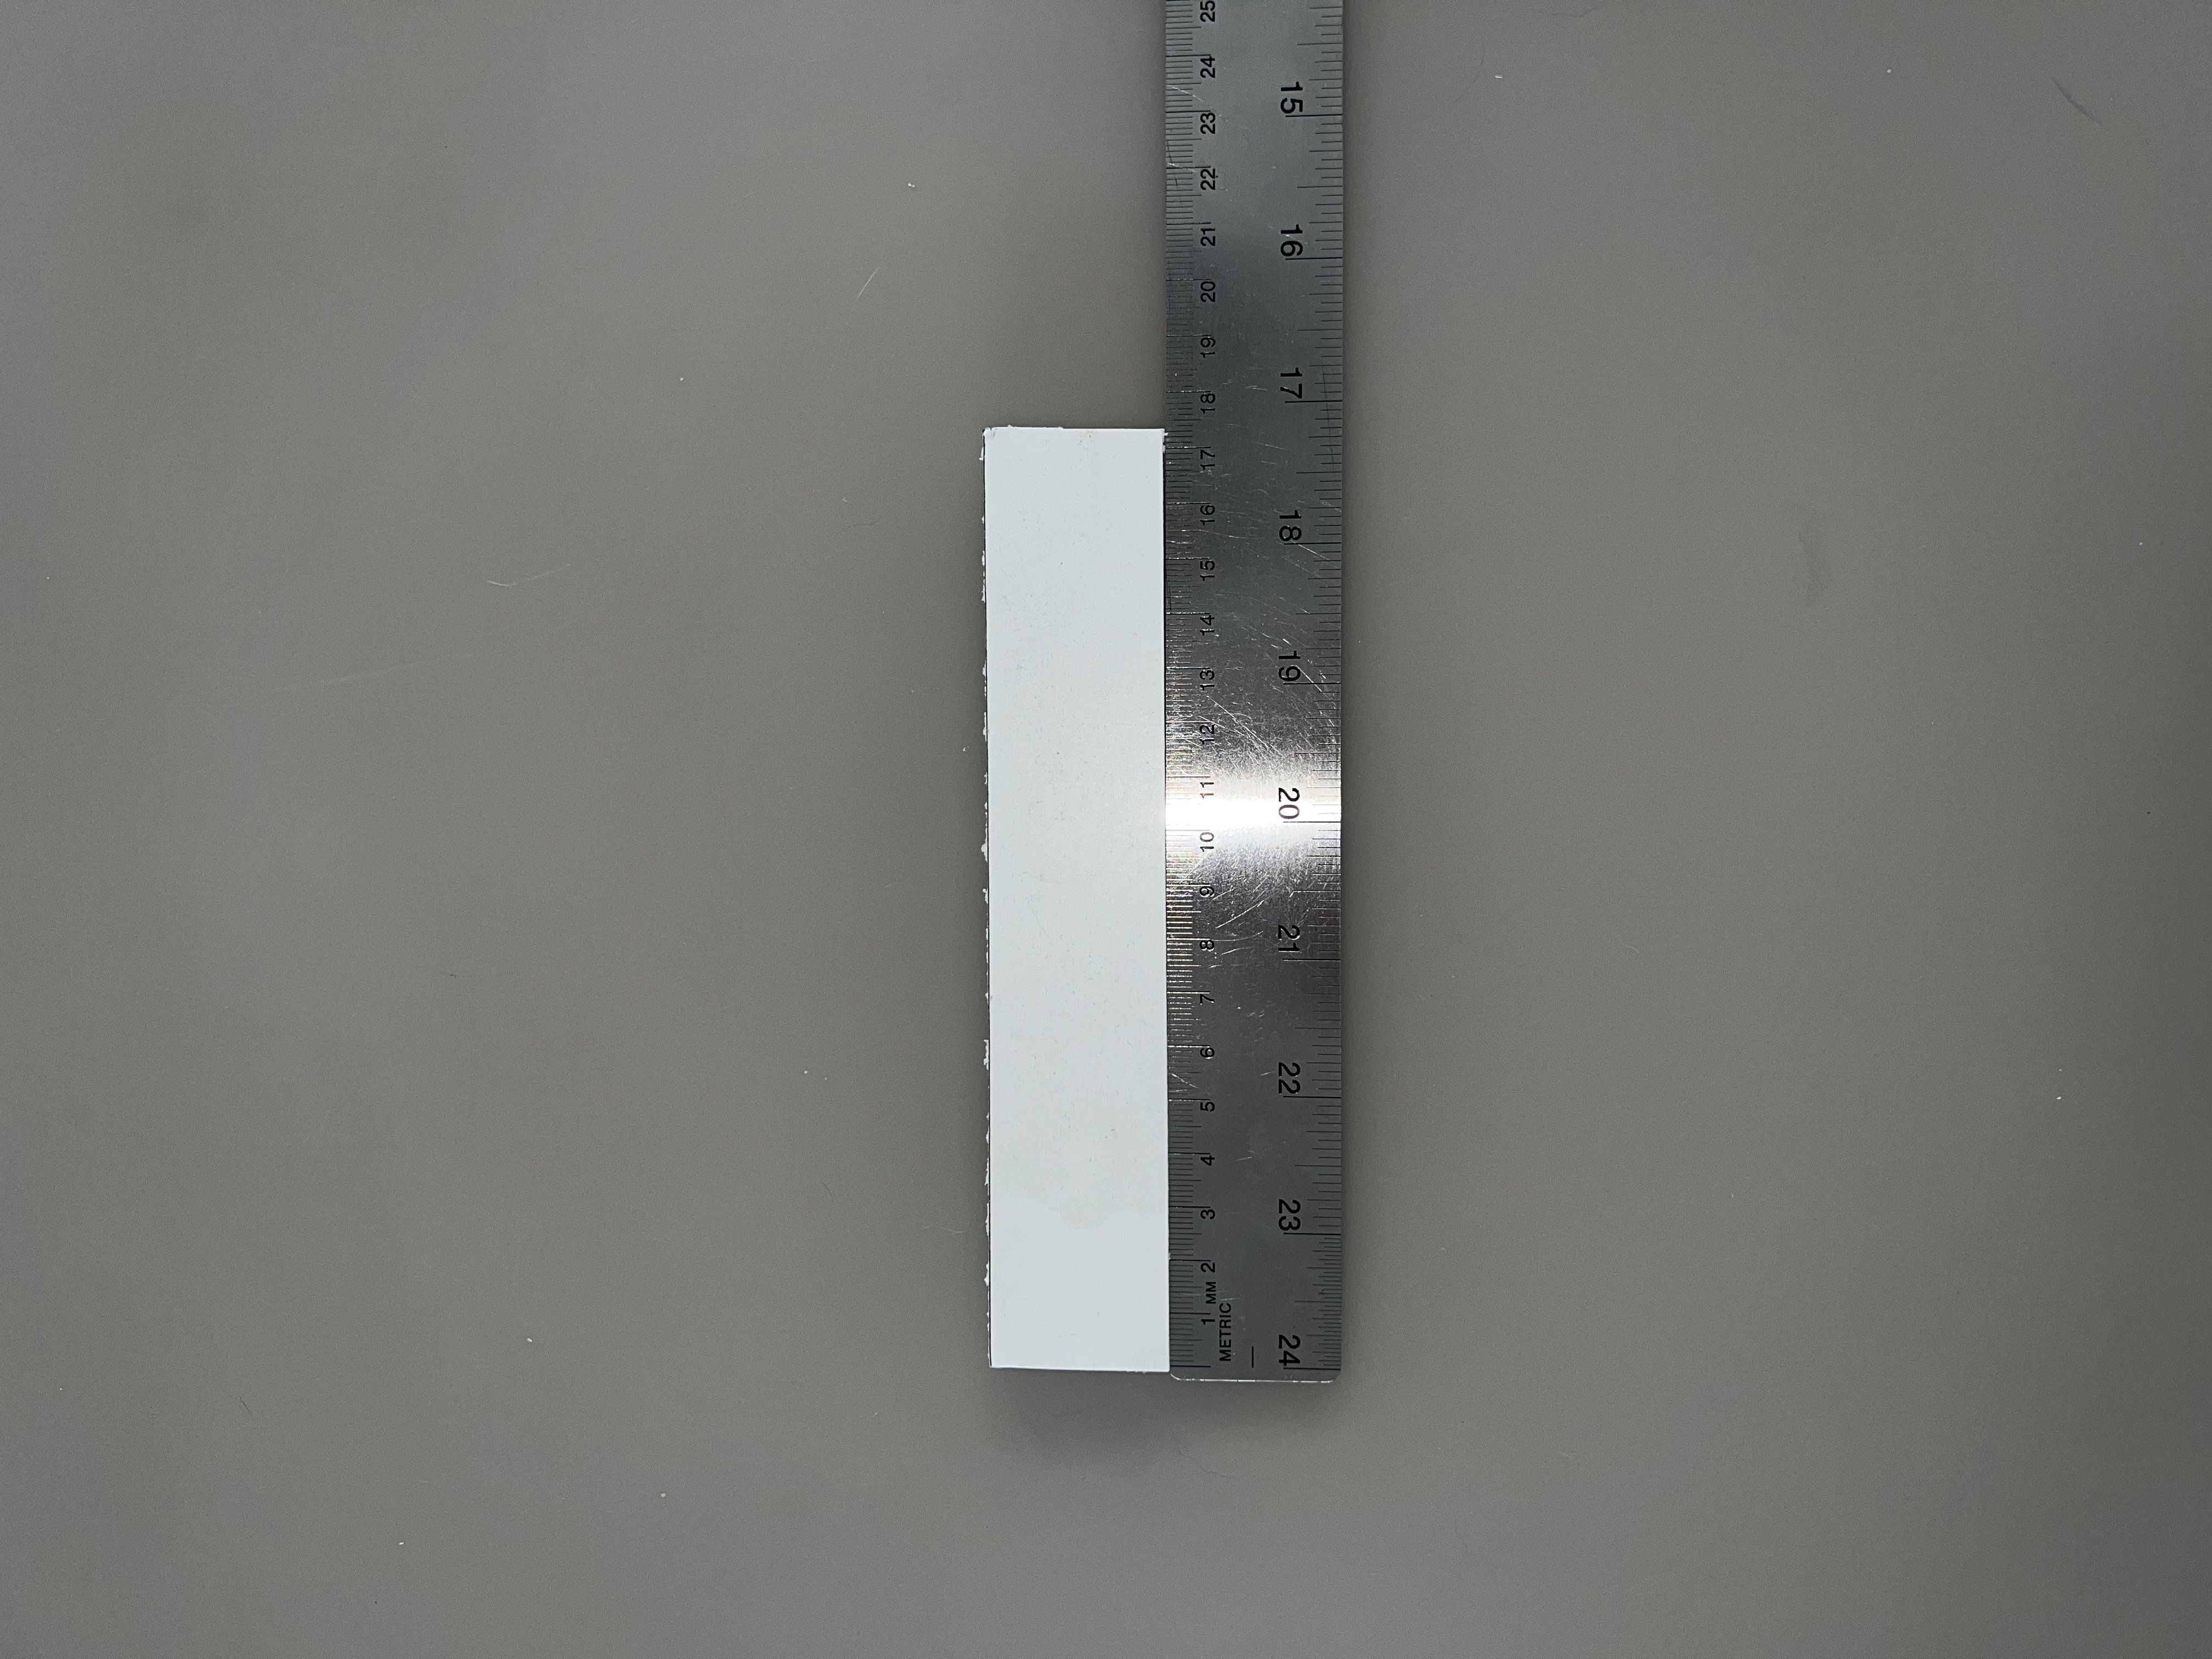

In [44]:
Image("Photos/Object_Control_Ruler_Full.jpg")

In this case, it is already known that the control object has a length of 17.5cm. Now, we must count the pixels from the starting point to the end point of the control object. This will enable us to have a ratio between the number of pixels per cm. 

To find the number of pixels in the height of the object, the next function is declared. Please take into account that the aim is to find the maximum values for the pixel that is most to the left of the object, as well as the most to the right pixel of the object. By having the difference between them, we can have the correct amount of pixels that form its boundaries

In [ ]:
def get_length(im):
    max_le=0
    min_le=1000
    for y in range(im.shape[0]):
        for x in range(im.shape[1]):
            if(im[y,x]==255):
                if(x<min_le):
                    min_le=x
                if(x>max_le):
                    max_le=x
    return max_le-min_le

In [11]:
get_height(im2_thresh)    

35

We can use the same approach to calculate the hight of the object: 

In [ ]:
def get_height(im):
    max_hi=0
    min_hi=1000
    for x in range(im.shape[1]):
        for y in range(im.shape[0]):
            if(im[y,x]==255):
                if(y<min_hi):
                    min_hi=y
                if(y>max_hi):
                    max_hi=y
    return max_hi-min_hi

In [12]:
get_length(im2_thresh)

175

As we already know, the total length of the control object is of 17.5cm. From the function above, it can also be observed that the amount of pixels from the starting point of the object to its ending point is of 175 pixels. This means that: 

$17.5cm = 175px \to 1cm = \frac{175}{17.5} \to 1cm = 10px$  

As the ratio between pixels and cm is already known, the meassurement can be obtained directly. <br>
The function "*process*" will be defined, as this process will be repeated to all objects within this example. <br>
Another important consideration that need to be made, is that the function "*adaptiveThreshold*" will be used to isolate the object from the background. For this specific case, this will be used as the images have certain shadows that will afect the simple binary theshold value. Also, by applying the "*Gaussian*" theshold, a much cleaner image can be obtained.

In [37]:
def process(path):
    im_temp=cv2.imread(path,0)
    im_thresh_temp=cv2.adaptiveThreshold(im_temp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 10)
    plt.figure(figsize=[18,5])
    plt.subplot(121); plt.imshow(im_temp,cmap='gray')
    plt.subplot(122); plt.imshow(im_thresh_temp, cmap='gray')
    print("Length is of {} cm".format(get_length(im_thresh_temp)/10))
    print("Height is of {} cm".format(get_height(im_thresh_temp)/10))

## Test Images

### Object 2

Length is of 9.4 cm
Height is of 5.6 cm


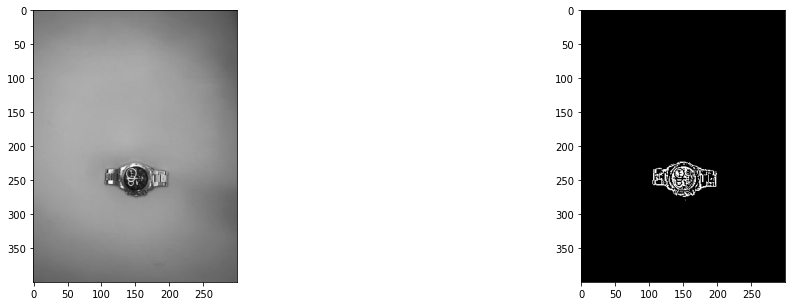

In [38]:
process("Photos/Object_2_Resized.jpg")

### Object 3

Length is of 5.6 cm
Height is of 27.5 cm


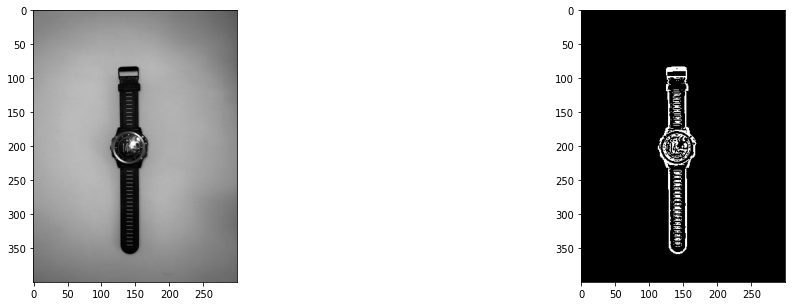

In [39]:
process("Photos/Object_3_Resized.jpg")

### Object 4

Length is of 19.0 cm
Height is of 26.1 cm


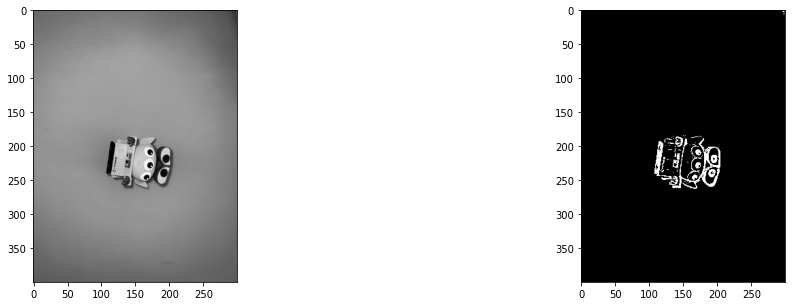

In [40]:
process("Photos/Object_4_Resized.jpg")

### Object 5

Length is of 16.1 cm
Height is of 1.9 cm


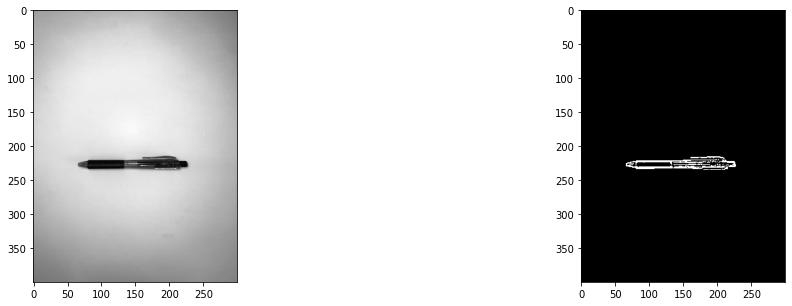

In [41]:
process("Photos/Object_5_Resized.jpg")

### Object 6

Length is of 26.9 cm
Height is of 9.1 cm


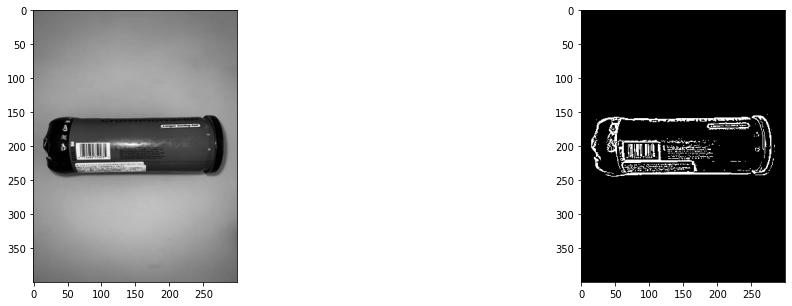

In [42]:
process("Photos/Object_6_Resized.jpg")